In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('log.csv')
data.head()

,Unnamed: 0,author_timestamp,hash,activity,commit_message,author_name,author_email,merge
0,0,2014-09-18T09:12:01-07:00,6a3abf2366e2c32ce3460155903262fee01736c8,Initial,Initial commit,Miško Hevery,misko@hevery.com,False
1,1,2014-09-18T14:56:38-07:00,afa761646472120edef1f9b01f219f125f20128e,build,build - refactor,Tobias Bosch,tbosch1009@gmail.com,False
2,2,2014-09-19T21:55:04+00:00,5af57922dbf5b3cf76adb5e3831f9aa21dddc17c,chore,chore: add .c9 to gitignore,Misko Hevery,misko@hevery.com,False
3,3,2014-09-19T21:55:37+00:00,9f1db3f2bcf67f49c9b145e1d1e8f090220372df,chore,chore: correct postinstall.sh script,Misko Hevery,misko@hevery.com,False
4,4,2014-09-19T23:03:36+00:00,6e4477fc0880e12c9f4c2959e4bf1ae075794bc3,WIP,WIP,Misko Hevery,misko@hevery.com,False


In [6]:
def compute_consistency(descriptions, avg_length_events_string, number_of_events):
    consistency_result = 0
    for description in descriptions:
        consistency_result += abs(len(description) - avg_length_events_string) 
    return consistency_result/number_of_events

number_of_traces = data.author_email.nunique()
number_of_events = len(data)
number_of_different_labels = data.activity.nunique()
labels_stats = data.groupby('activity').author_email.count()
number_of_unique_labels = len(labels_stats[labels_stats==1])

uniqueness = number_of_unique_labels/number_of_events
complexity = np.average(data.groupby('author_email').activity.count())
relevancy = number_of_different_labels/number_of_events
avg_length_events_string = sum( map(len, list(data.commit_message)) ) / len(list(data.commit_message))
consistency = compute_consistency(data.commit_message, avg_length_events_string, number_of_events)

print("number of traces:", number_of_traces)
print("number of events:", number_of_events)
print("number of different labels:", number_of_different_labels)
print("number of unique labels:", number_of_unique_labels)
print("uniqueness:", uniqueness)
print("complexity:", complexity)
print("relevancy:", relevancy)
print("consistency:", consistency)

number of traces: 1975
number of events: 27104
number of different labels: 112
number of unique labels: 67
uniqueness: 0.002471959858323495
complexity: 13.721518987341772
relevancy: 0.004132231404958678
consistency: 191.64341661603942


In [69]:
# display activity labels represented only by one event
labels_stats[labels_stats==1].index

Index(['Adding', 'Address', 'BUG', 'Bump', 'Check', 'Configure', 'Copy', 'Doc',
       'FIX', 'Feat', 'Fixes', 'Form', 'Format', 'Include', 'Keep', 'Make',
       'Merge', 'Produce', 'README', 'Read', 'Refactor', 'Removed',
       'RendererV2', 'Replaced', 'Roll', 'Router', 'SQUASH', 'Tweak',
       'Updating', 'adds', 'benchmarks', 'buid', 'changelog', 'chare', 'clean',
       'code', 'consolidated', 'edit', 'features', 'filetree', 'finished',
       'first', 'fixes', 'for', 'hr', 'make', 'misc', 'patch', 'reactor',
       'readme', 'reafactor', 'refacor', 'refact', 'refatcor', 'refector',
       'removed', 'removes', 'resolve', 'squash-me', 'table', 'temporary',
       'text', 'transpiler', 'tweak', 'updated', 'upgrade', 'use'],
      dtype='object', name='activity')

In [12]:
# trace length stats
# trace_id = author_email 
traces_stats = data.groupby('author_email').activity.count()
traces_stats.describe()

count    1975.000000
mean       13.721519
std        88.086293
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1928.000000
Name: activity, dtype: float64

In [14]:
traces_stats[traces_stats > 1000]

author_email
kalpakas.g@gmail.com    1928
pete@bacondarwin.com    1771
Name: activity, dtype: int64

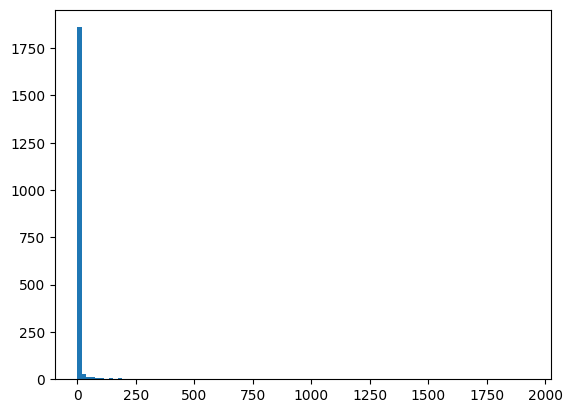

In [23]:
import matplotlib.pyplot as plt

plt.hist(traces_stats, bins = 100)
plt.show()

(array([1.000e+00, 1.331e+03, 2.590e+02, 1.030e+02, 6.700e+01, 2.500e+01,
        1.700e+01, 1.400e+01, 9.000e+00, 5.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

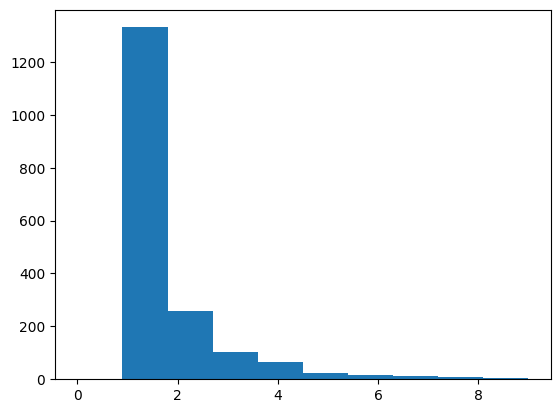

In [19]:
plt.hist(traces_stats[traces_stats < 10])

In [30]:
#anomaly detected
data[data.activity != data.activity]

,Unnamed: 0,author_timestamp,hash,activity,commit_message,author_name,author_email,merge
698,698,2015-03-16T22:46:05+01:00,6fe294ff2b324c4ff80e7f50cce0c5b8580290b7,NaN,(docs) decorator events typo?\n\nOk I'm not su...,Nick Van Dyck,vandyck.nick@outlook.com,False
732,732,2015-03-19T14:31:41+01:00,f1fca5abb67a9f7753c7074f7c08b48fe5d49097,NaN,(docs) decorator events property\n\nAs from wh...,Nick Van Dyck,vandyck.nick@outlook.com,False
4364,4364,2016-03-24T14:14:41-07:00,9c2fe660a3f50a5eafc945a2dfc0711ef027e6cd,NaN,(docs) Fix pony greeting equivalence\n\nCheats...,cjc343,cjc343@gmail.com,False
5673,5673,2016-09-27T13:10:45-04:00,a241ab7c07c8f10936fc067a799ae23ac288b4cc,NaN,(docs): removing `addProvider` from `UpgradeAd...,Austin,amcdaniel2@gmail.com,False


In [33]:
data.activity.unique()

array(['Initial', 'build', 'chore', 'WIP', 'chare', 'refactor', 'update',
       'first', 'moved', 'design', 'fix', 'test', 'feat', 'doc', 'fixes',
       'style', 'transpiler', 'feature', 'use', 'docs', 'perf', 'cleanup',
       'Fixed', 'bug', 'benchmark', 'Add', 'Replaced', 'make', 'Update',
       'tweak', 'Remove', 'Doc', 'more', 'add', 'tests', 'Format',
       'release', 'clean', "Don't", 'removed', nan, 'fixed', 'Fix',
       'README', 'example', 'reafactor', 'DEVELOPER.md', 'misc',
       'Address', 'Read', 'Tweak', 'Updating', 'BUG', 'refacor', 'Copy',
       'Merge', 'squash-me', 'revert', 'examples', 'Revert', 'tools',
       'Feat', 'Refactor', 'Removed', 'refector', 'Adding', 'Fixes',
       'temporary', 'resolve', 'Produce', 'typo', 'for', 'SQUASH',
       'patch', 'Make', 'ci', 'change', 'Typo', 'refact', 'Roll',
       'repackaging', 'adds', 'Condition', 'Bump', 'changelog', 'npm',
       'removes', 'readme', 'upgrade', 'Configure', 'refatcor', 'Router',
       'edit',

In [39]:
activity_low = pd.Series([str(sentence).lower() for sentence in data.activity])

In [46]:
# lowercase transformation
t = activity_low.unique()
t.sort()
t

array(['add', 'adding', 'address', 'adds', 'aio', 'benchmark',
       'benchmarks', 'bug', 'buid', 'build', 'bump', 'change',
       'changelog', 'chare', 'check', 'chore', 'ci', 'clean', 'cleanup',
       'code', 'condition', 'configure', 'consolidated', 'copy', 'design',
       'developer.md', 'doc', 'docs', "don't", 'edit', 'example',
       'examples', 'feat', 'feature', 'features', 'filetree', 'finished',
       'first', 'fix', 'fixed', 'fixes', 'fixup!', 'for', 'form',
       'format', 'hr', 'include', 'initial', 'keep', 'make', 'merge',
       'misc', 'more', 'moved', 'nan', 'npm', 'patch', 'perf', 'produce',
       'reactor', 'read', 'readme', 'reafactor', 'refacor', 'refact',
       'refactor', 'refatcor', 'refector', 'release', 'remove', 'removed',
       'removes', 'rendererv2', 'repackaging', 'replaced', 'resolve',
       'revert', 'roll', 'router', 'squash', 'squash-me', 'style',
       'table', 'temporary', 'test', 'tests', 'text', 'tools',
       'transpiler', 'tweak', '

In [42]:
activity_low.nunique()

97

In [52]:
len(data[data['merge'] == True])

4

In [53]:
# test if stemming is suitable for preprocessing
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
activity_stem = [snowball_stemmer.stem(word) for word in activity_low]

In [57]:
t = pd.Series(activity_stem).unique()
t.sort()
t

array(['ad', 'add', 'address', 'aio', 'benchmark', 'bug', 'buid', 'build',
       'bump', 'chang', 'changelog', 'chare', 'check', 'chore', 'ci',
       'clean', 'cleanup', 'code', 'condit', 'configur', 'consolid',
       'copi', 'design', 'developer.md', 'doc', "don't", 'edit', 'exampl',
       'feat', 'featur', 'filetre', 'finish', 'first', 'fix', 'fixup!',
       'for', 'form', 'format', 'hr', 'includ', 'initi', 'keep', 'make',
       'merg', 'misc', 'more', 'move', 'nan', 'npm', 'patch', 'perf',
       'produc', 'reactor', 'read', 'readm', 'reafactor', 'refacor',
       'refact', 'refactor', 'refatcor', 'refector', 'releas', 'remov',
       'rendererv2', 'repackag', 'replac', 'resolv', 'revert', 'roll',
       'router', 'squash', 'squash-m', 'style', 'tabl', 'temporari',
       'test', 'text', 'tool', 'transpil', 'tweak', 'typo', 'updat',
       'upgrad', 'use', 'wip'], dtype=object)

In [58]:
len(t)

85

In [75]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

# lowercase transformation + lemmatization
raw = data.activity
lower = [str(word).lower() for word in raw]
lemmatized = [lemmatizer.lemmatize(word) for word in lower]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/elizavetabelanina/nltk_data...


In [76]:
def count_freq(data_array):
    c = 0
    frequencies = {}
    for item in data_array:
        if item in frequencies:
            frequencies[item] += 1
        else:
            frequencies[item] = 1
    
    for label in frequencies:
        if frequencies[label] == 1:
            c += 1 
    return(frequencies, c)

In [86]:
# count labels frequencies and display the result in ascending order 
sorted(f.items(), key=lambda x:x[1])

[('chare', 1),
 ('first', 1),
 ('transpiler', 1),
 ('use', 1),
 ('replaced', 1),
 ('format', 1),
 ('clean', 1),
 ('reafactor', 1),
 ('misc', 1),
 ('address', 1),
 ('read', 1),
 ('updating', 1),
 ('refacor', 1),
 ('copy', 1),
 ('merge', 1),
 ('squash-me', 1),
 ('refector', 1),
 ('adding', 1),
 ('temporary', 1),
 ('resolve', 1),
 ('produce', 1),
 ('for', 1),
 ('squash', 1),
 ('patch', 1),
 ('refact', 1),
 ('roll', 1),
 ('bump', 1),
 ('changelog', 1),
 ('upgrade', 1),
 ('configure', 1),
 ('refatcor', 1),
 ('router', 1),
 ('edit', 1),
 ('finished', 1),
 ('text', 1),
 ('form', 1),
 ('check', 1),
 ('keep', 1),
 ('include', 1),
 ('buid', 1),
 ('rendererv2', 1),
 ('code', 1),
 ('filetree', 1),
 ('table', 1),
 ('consolidated', 1),
 ('hr', 1),
 ('updated', 1),
 ('reactor', 1),
 ('initial', 2),
 ('wip', 2),
 ('moved', 2),
 ('make', 2),
 ('tweak', 2),
 ('more', 2),
 ("don't", 2),
 ('removed', 2),
 ('readme', 2),
 ('developer.md', 2),
 ('repackaging', 2),
 ('condition', 2),
 ('npm', 2),
 ('benchmar

In [87]:
sorted(f.items(), key=lambda x:x[0])

[('add', 10),
 ('adding', 1),
 ('address', 1),
 ('aio', 3),
 ('benchmark', 3),
 ('bug', 5),
 ('buid', 1),
 ('build', 3897),
 ('bump', 1),
 ('change', 3),
 ('changelog', 1),
 ('chare', 1),
 ('check', 1),
 ('chore', 1104),
 ('ci', 931),
 ('clean', 1),
 ('cleanup', 69),
 ('code', 1),
 ('condition', 2),
 ('configure', 1),
 ('consolidated', 1),
 ('copy', 1),
 ('design', 7),
 ('developer.md', 2),
 ('doc', 5365),
 ("don't", 2),
 ('edit', 1),
 ('example', 9),
 ('feat', 2849),
 ('feature', 14),
 ('filetree', 1),
 ('finished', 1),
 ('first', 1),
 ('fix', 5996),
 ('fixed', 8),
 ('fixup!', 21),
 ('for', 1),
 ('form', 1),
 ('format', 1),
 ('hr', 1),
 ('include', 1),
 ('initial', 2),
 ('keep', 1),
 ('make', 2),
 ('merge', 1),
 ('misc', 1),
 ('more', 2),
 ('moved', 2),
 ('nan', 4),
 ('npm', 2),
 ('patch', 1),
 ('perf', 373),
 ('produce', 1),
 ('reactor', 1),
 ('read', 1),
 ('readme', 2),
 ('reafactor', 1),
 ('refacor', 1),
 ('refact', 1),
 ('refactor', 3876),
 ('refatcor', 1),
 ('refector', 1),
 ('re

In [94]:
# manually merge variations of the same activities
merged = []
for word in lemmatized:
    if word in ['reactor','reafactor','refacor','refact','refatcor','refector']:
        merged.append('refactor')
    
    elif word in ['updated','updating']:
        merged.append('update')
        
    elif word in ['nan', 'doc']:
        merged.append('docs')
    
    elif word == 'removed':
        merged.append('remove')
        
    elif word == 'clean':
        merged.append('cleanup')
        
    elif word == 'adding':
        merged.append('add')
        
    elif word == 'buid':
        merged.append('build')
        
    elif word == 'feature':
        merged.append('feat')
        
    elif word in ['fixed', 'fixup!']:
        merged.append('fix')
        
    else:
        merged.append(word)
        
print(len(merged) == len(lemmatized))

True


In [95]:
f_new, c_new = count_freq(merged)
print(len(f_new))
print(c_new)

73
37


In [107]:
#count stats
a = 0
e = 0
for label in f_new:
    if f_new[label] > 10:
        a += 1
        e += f_new[label]
        
print(e/number_of_events*100, '% events is covered by ', a/len(f_new)*100, '% activity labels') 

99.60153482880756 % events is covered by  20.54794520547945 % activity labels


In [108]:
a

15

In [109]:
data['activity_preprocessed'] = merged

In [110]:
data.head()

,Unnamed: 0,author_timestamp,hash,activity,commit_message,author_name,author_email,merge,activity_preprocessed
0,0,2014-09-18T09:12:01-07:00,6a3abf2366e2c32ce3460155903262fee01736c8,Initial,Initial commit,Miško Hevery,misko@hevery.com,False,initial
1,1,2014-09-18T14:56:38-07:00,afa761646472120edef1f9b01f219f125f20128e,build,build - refactor,Tobias Bosch,tbosch1009@gmail.com,False,build
2,2,2014-09-19T21:55:04+00:00,5af57922dbf5b3cf76adb5e3831f9aa21dddc17c,chore,chore: add .c9 to gitignore,Misko Hevery,misko@hevery.com,False,chore
3,3,2014-09-19T21:55:37+00:00,9f1db3f2bcf67f49c9b145e1d1e8f090220372df,chore,chore: correct postinstall.sh script,Misko Hevery,misko@hevery.com,False,chore
4,4,2014-09-19T23:03:36+00:00,6e4477fc0880e12c9f4c2959e4bf1ae075794bc3,WIP,WIP,Misko Hevery,misko@hevery.com,False,wip


In [116]:
len(data[data.activity != data.activity_preprocessed])/len(data)

0.0216573199527745

In [115]:
data.to_csv('preprocessed_labels.csv')

In [119]:
len(data.commit_message[0].split())

2

In [121]:
# compute commit message length statistics
lengths = pd.Series([len(sent.split()) for sent in data.commit_message])

In [123]:
lengths.describe()

count    27104.000000
mean        33.361460
std         46.962509
min          1.000000
25%          9.000000
50%         16.000000
75%         42.000000
max       2631.000000
dtype: float64